# Librerias

In [10]:
# Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recopilación de Datos

- Obtenemos las dimensiones

- Obtener información sobre tipos de datos y valores no nulos

In [11]:
#Recopilar datos

data = pd.read_csv("../data/raw/AB_NYC_2019.csv")

data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [12]:
#Obtener las dimensiones

data.shape

(48895, 16)

In [13]:
#Obtener información sobre tipo de datos y valores nulos.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Conclusiones:

- Dimensiones: Hay un total de 48895 pisos de AirBnB en Nueva York con 16 columnas de información cada uno.

- Valores nulos: Las variables last-review y reviews per month cuentan con 10052 valores nulos (Alrededor de un 12% de los datos totales). Las variables name y host_name tambien tienen valores nulos pero en muy menos medida.

- Tipo de datos: Hay un total de 6 variables categoricas y 10 variables numéricas.

# Limpieza de Datos

- Eliminar duplicados

- Eliminar datos irrelevantes

In [17]:
#Funcion para eliminar duplicados

#Columna identificadora del Dataset. Aunque en este caso no haga falta la dejo para poder reutilizarla más adelante.
#col_id = "id"

def EraseDuplicates(dataset, id = "id"):
    older_shape = dataset.shape
    if (dataset.drop(id, axis = 1).duplicated().sum()):
        print ("Erase duplicates...")
        dataset.drop(id, axis = 1, inplace = True)
        dataset.drop_duplicates()
    else:
        print ("No coincidences.")
        dataset.drop(id, axis=1, inplace = True)
        pass
    
    print (f"The older dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    
    return dataset

EraseDuplicates(data)

data


No coincidences.
The older dimension of dataset is (48895, 16), and the new dimension is (48895, 15).


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [18]:
#Funcion para eliminar datos irrelevantes.

irrelevant_lst = ["name","host_id","host_name","neighbourhood","latitude","longitude","last_review","reviews_per_month"]

def EraseIrrelevants(dataset, lst):
    older_shape = data.shape
    print("Erase irrelevant´s dates...")
    dataset.drop(lst, axis = 1, inplace = True)
    print (f"The old dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    return dataset

EraseIrrelevants(data, irrelevant_lst)

data

Erase irrelevant´s dates...
The old dimension of dataset is (48895, 15), and the new dimension is (48895, 7).


,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
1,Manhattan,Entire home/apt,225,1,45,2,355
2,Manhattan,Private room,150,3,0,1,365
3,Brooklyn,Entire home/apt,89,1,270,1,194
4,Manhattan,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,0,2,9
48891,Brooklyn,Private room,40,4,0,2,36
48892,Manhattan,Entire home/apt,115,10,0,1,27
48893,Manhattan,Shared room,55,1,0,6,2


# Criterio de eliminación.

- id: Es el identificador del dataset, no da información alguna.

- host_id, host_name: información totalmente irrelevante sobre el propietario del inmueble.

- neighbounrhood, latitude, longitude: información sobre la ubicación del inmueble, teniendo el campo categorico "neighbourhood_group" mucha más ordenado y trabajable estos campos son redundantes.

- last_reviews, reviews_per_month: campos con un considerable número de valores vacios, además de no considerar que sean relevantes teniendo el campo "number_of_reviews" y "calculated_host_listing_count" que dan una información similar pero más general.

# Analisis de variables univariantes

- Analisis sobre variables categóricas

- Analisis sobre variables numéricas

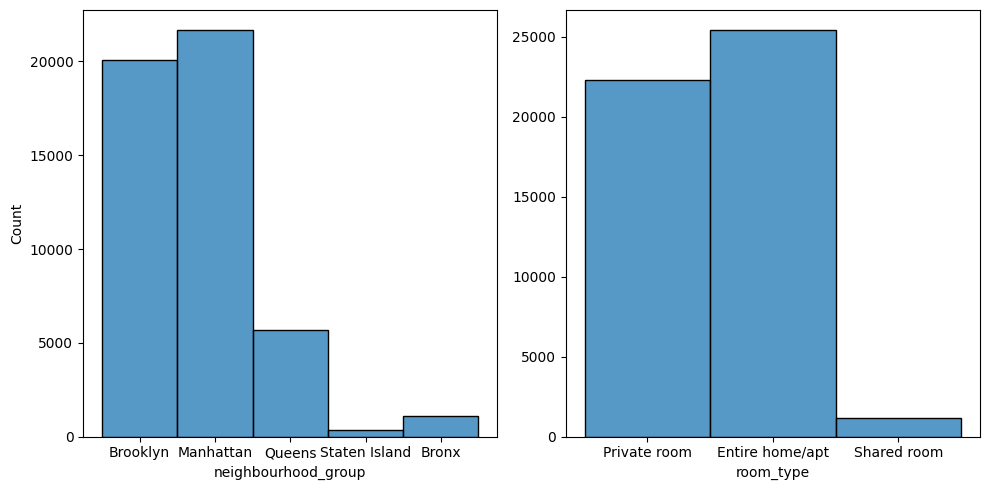

In [28]:
# Analisis sobre variables categoricas

def CategoricGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(10,5))

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0], data = dataset, x = "neighbourhood_group")
    sns.histplot( ax = axis[1],data = dataset, x = "room_type").set(ylabel=None)

    #Mostramos el grafico.
    plt.tight_layout()
    plt.show()

CategoricGraf(data)

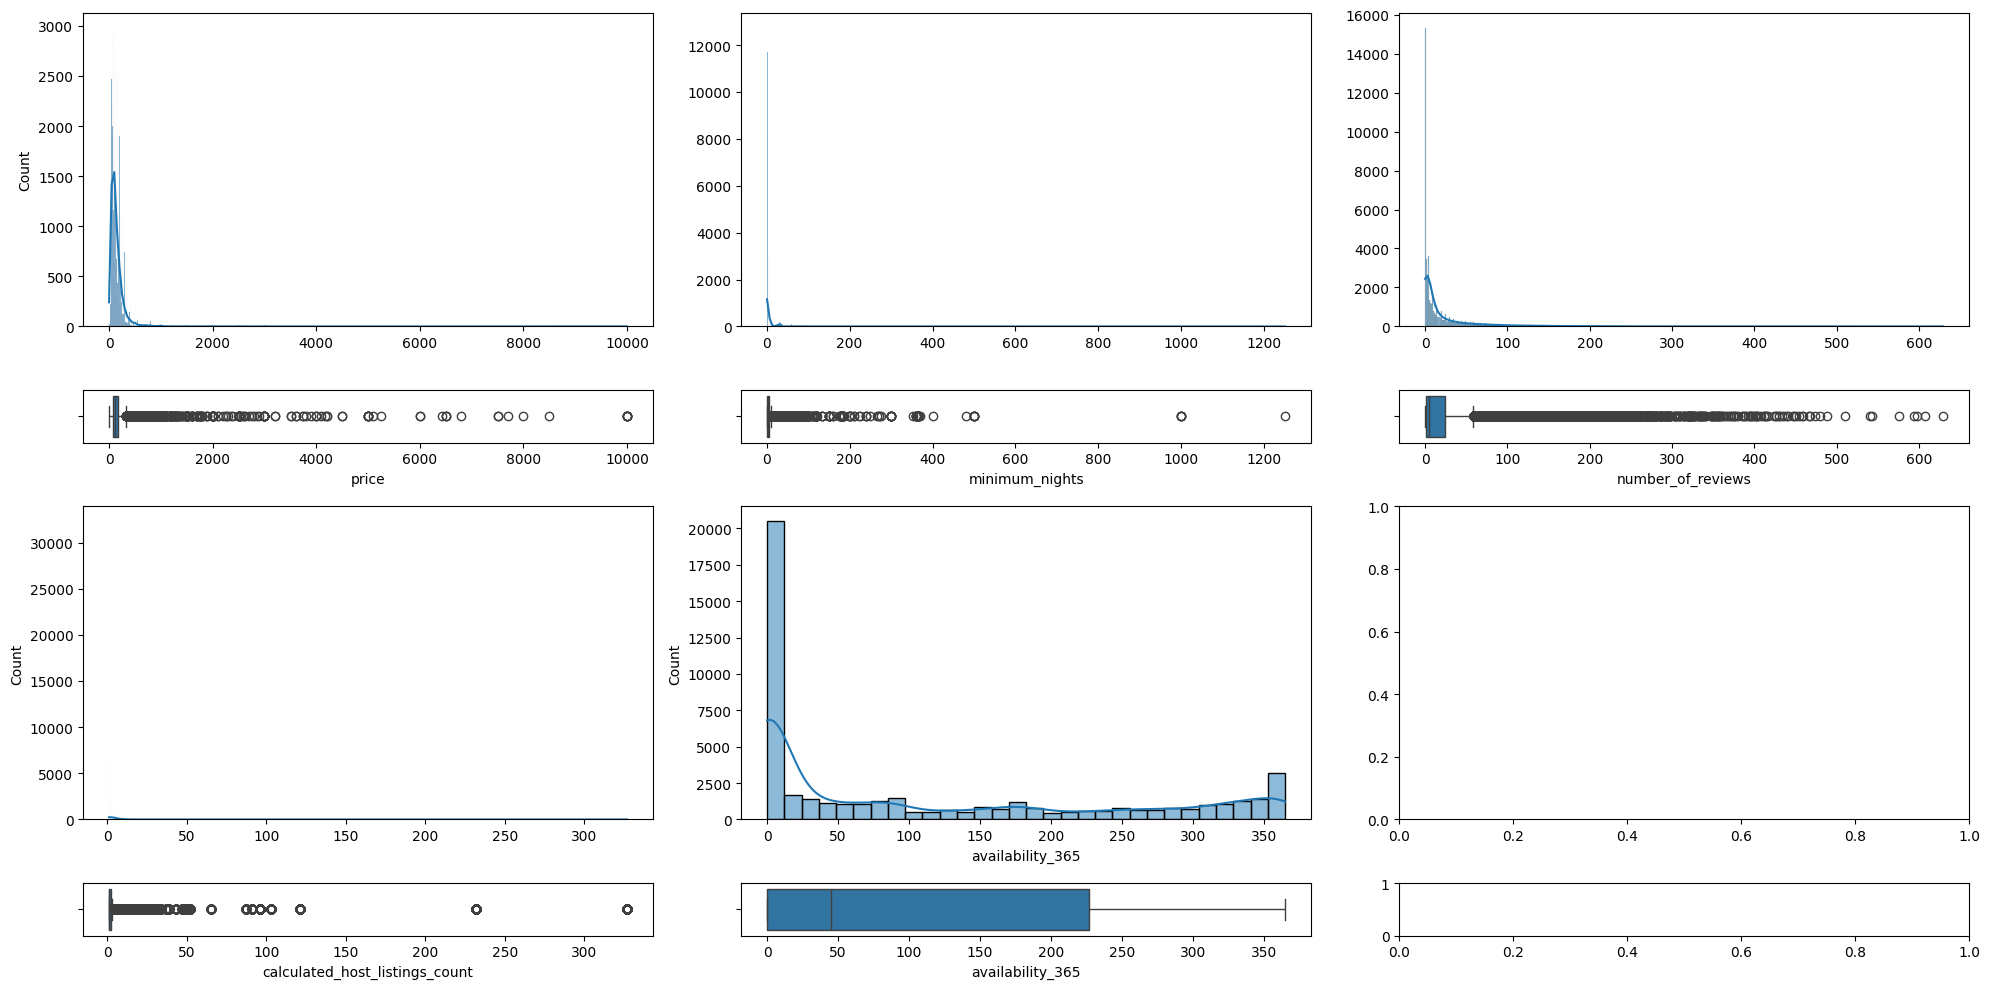

In [46]:
# Analisis sobre variables numericas

def NumericalGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 3, figsize=(20,10), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0,0], data = dataset, x = "price", kde=True).set(xlabel=None)
    sns.boxplot( ax = axis[1,0], data = dataset, x = "price")
    sns.histplot( ax = axis[0,1], data = dataset, x = "minimum_nights", kde=True).set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[1,1], data = dataset, x = "minimum_nights")
    sns.histplot( ax = axis[0,2], data = dataset, x = "number_of_reviews", kde=True).set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[1,2], data = dataset, x = "number_of_reviews")
    sns.histplot( ax = axis[2,0], data = dataset, x = "calculated_host_listings_count", kde=True).set(xlabel=None)
    sns.boxplot(ax = axis[3,0], data = dataset, x = "calculated_host_listings_count")
    sns.histplot(ax = axis[2,1], data = dataset, x = "availability_365", kde=True)
    sns.boxplot( ax = axis[3,1], data = dataset, x = "availability_365")
    
    plt.tight_layout()
    plt.show()

NumericalGraf(data)

    

# Conclusiones

# Analisis de variable multivariante

- Analisis numérico/numérico

- Analisis categórico/categórico

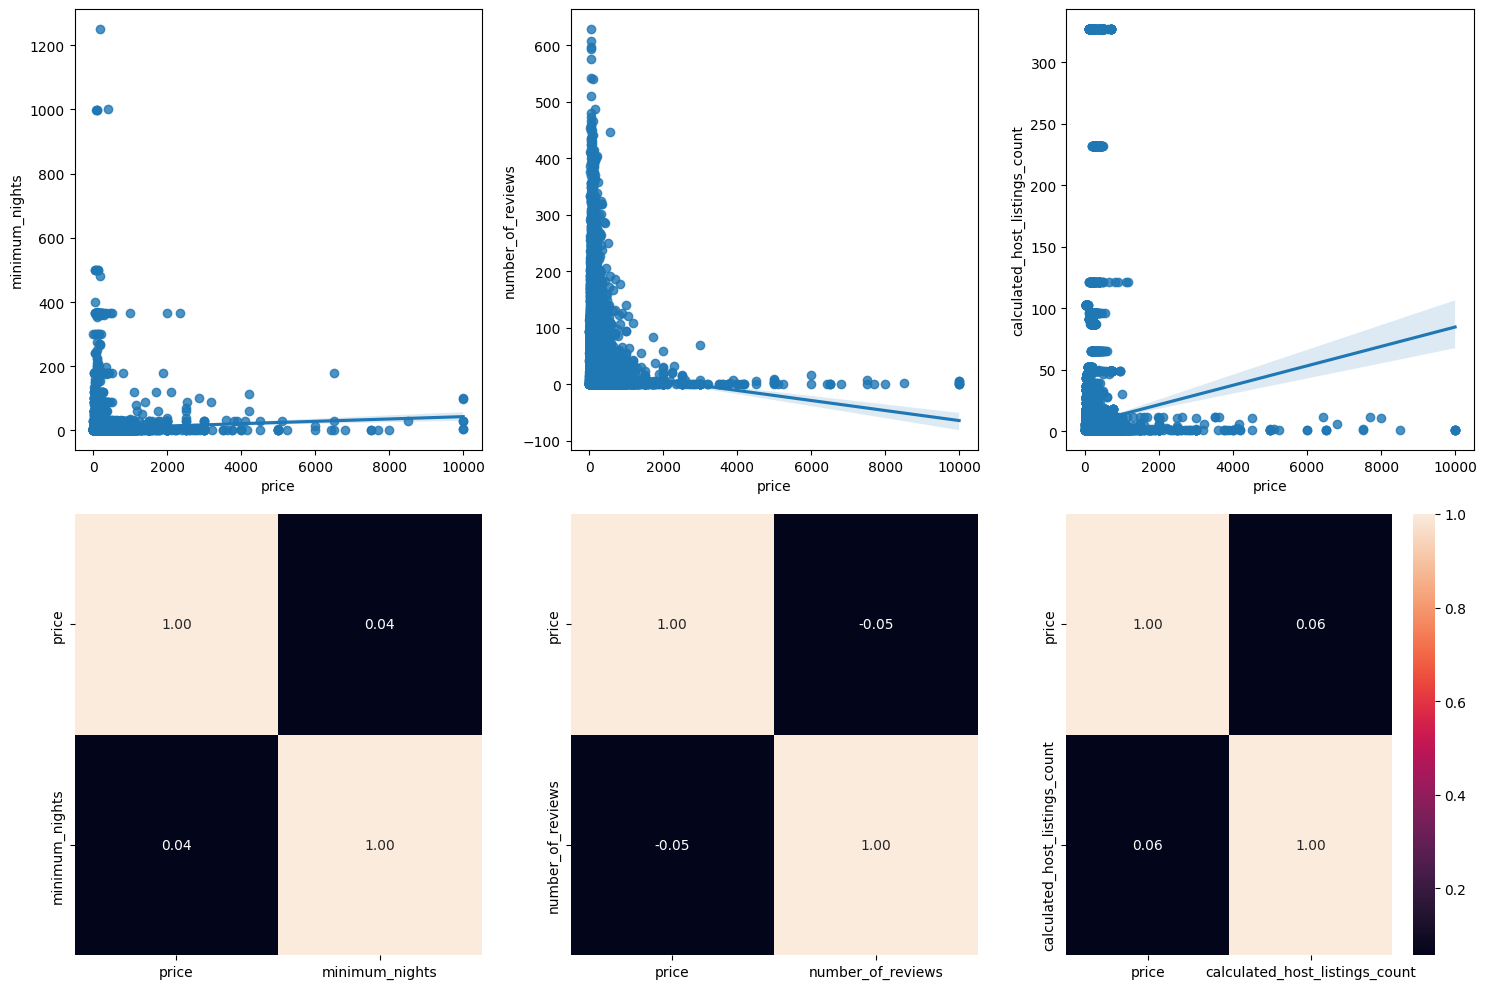

In [67]:
#Analisis numerico/numerico

def NumericalNumericalGraf(dataset, x, y_list):
    #Creamos la figura
    fig, axis = plt.subplots(2, 3, figsize=(15,10))

    #Creamos la grafica
    sns.regplot( ax = axis[0,0], data = dataset, x = x, y = y_list[0])
    sns.heatmap( dataset[[x,y_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1,0], cbar=False)
    sns.regplot( ax = axis[0,1], data = dataset, x = x, y = y_list[1])
    sns.heatmap( dataset[[x, y_list[1]]].corr(), annot=True, fmt=".2f", ax = axis [1,1], cbar=False)
    sns.regplot( ax = axis[0,2], data = dataset, x = x, y = y_list[2])
    sns.heatmap( dataset[[x, y_list[2]]].corr(), annot=True, fmt=".2f", ax = axis[1,2])

    plt.tight_layout()
    plt.show()

NumericalNumericalGraf(data, "price", ["minimum_nights", "number_of_reviews", "calculated_host_listings_count"])

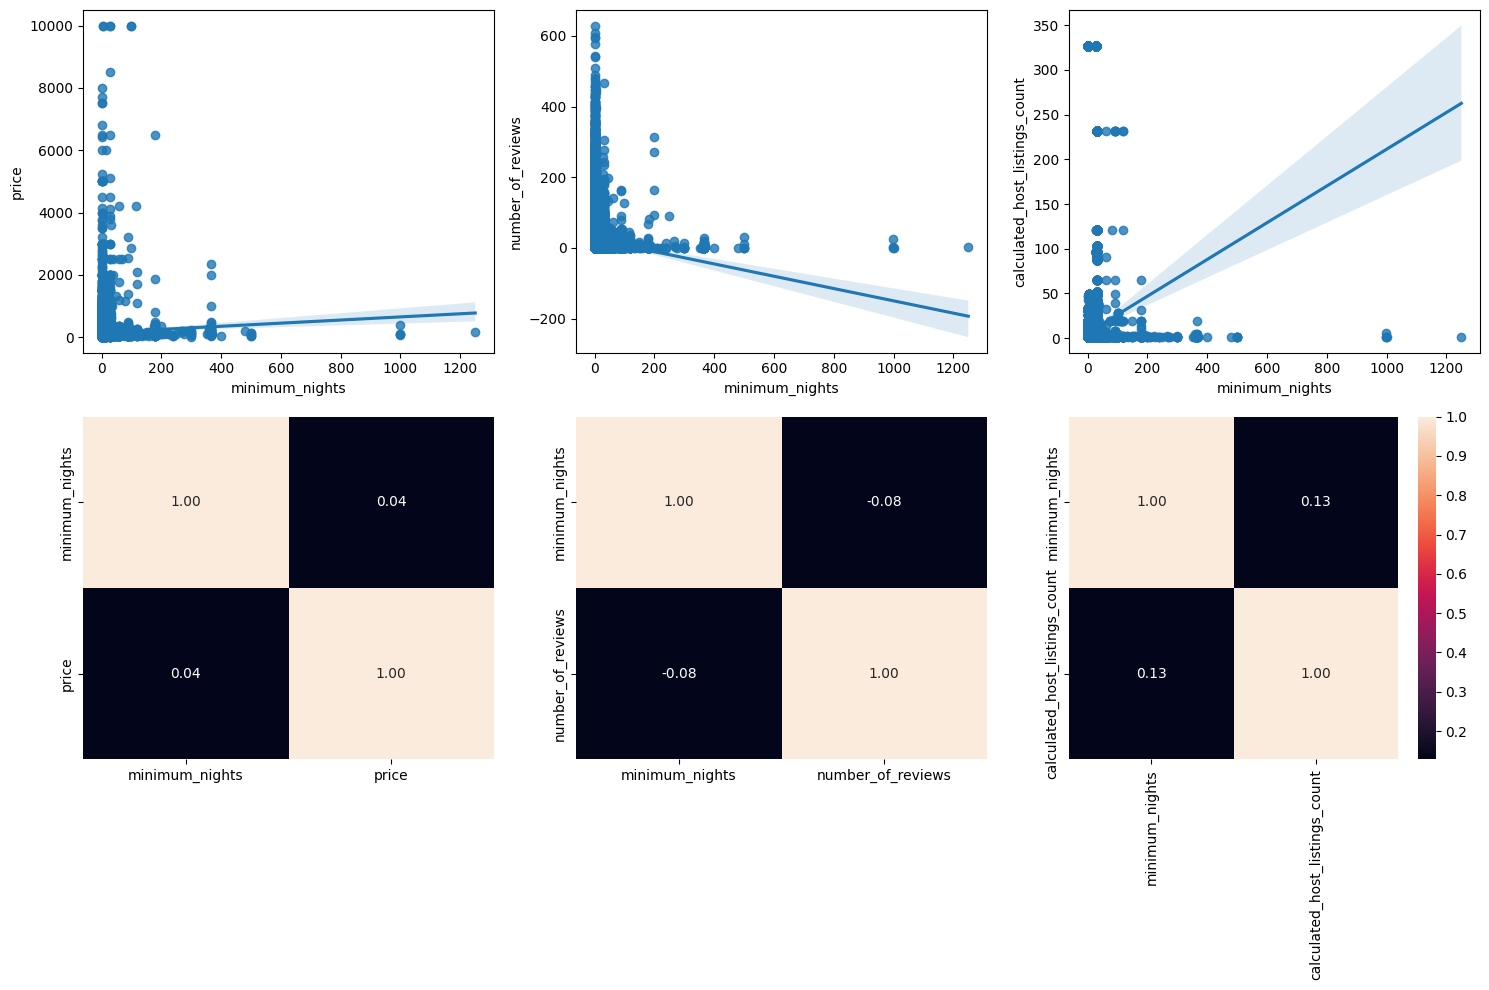

In [68]:
NumericalNumericalGraf(data, "minimum_nights", ["price", "number_of_reviews", "calculated_host_listings_count"])

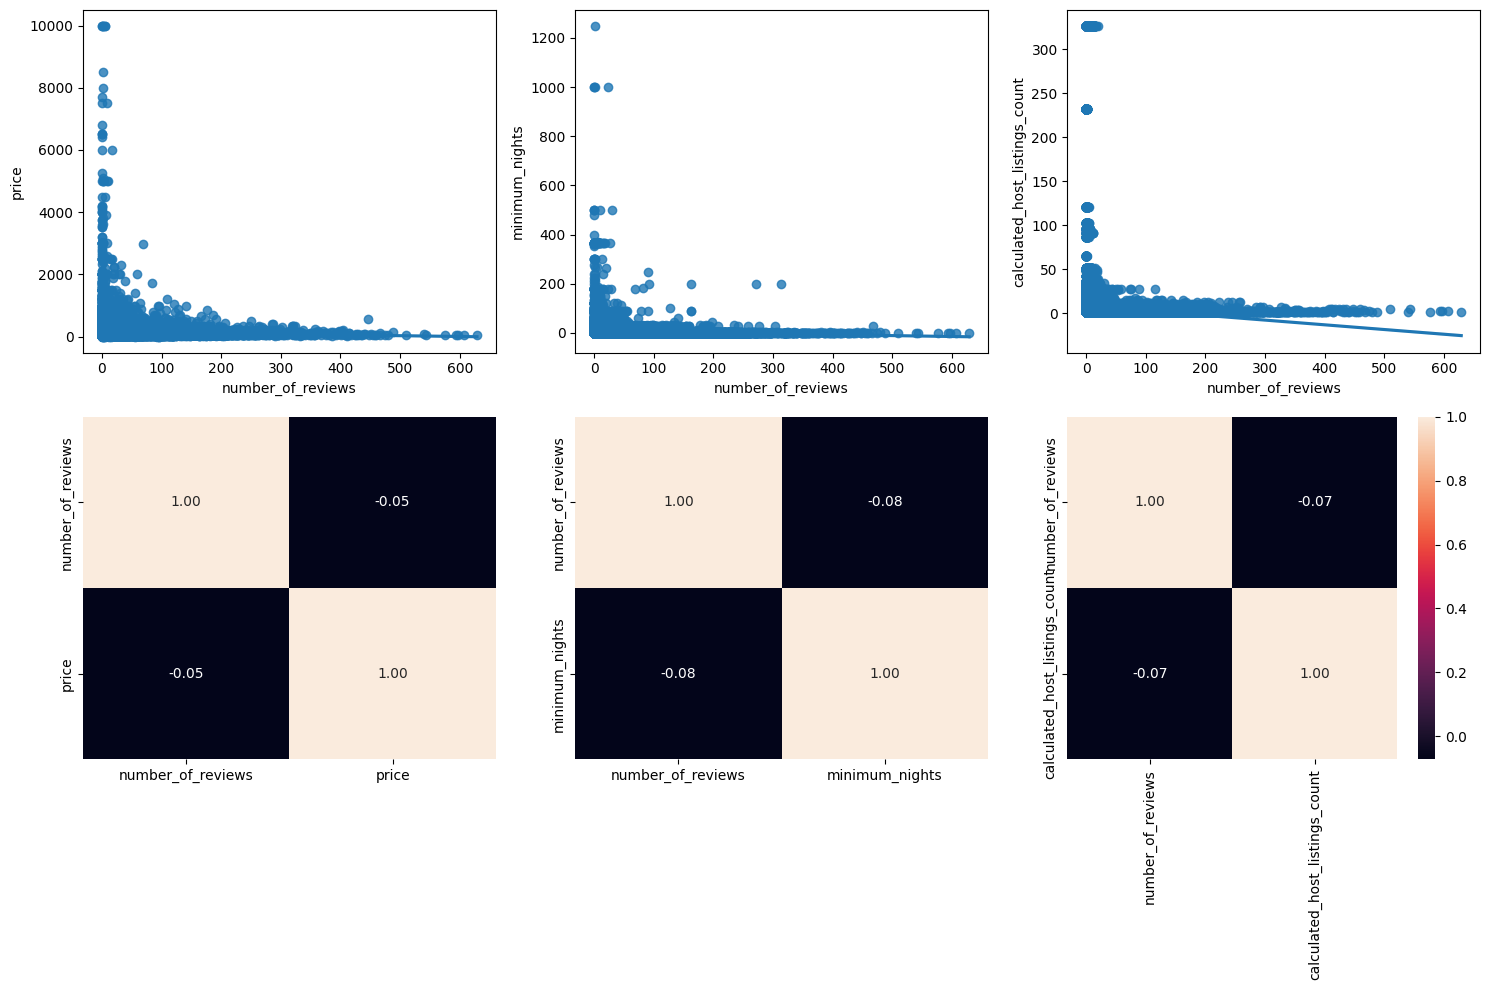

In [69]:
NumericalNumericalGraf(data, "number_of_reviews", ["price", "minimum_nights", "calculated_host_listings_count"])

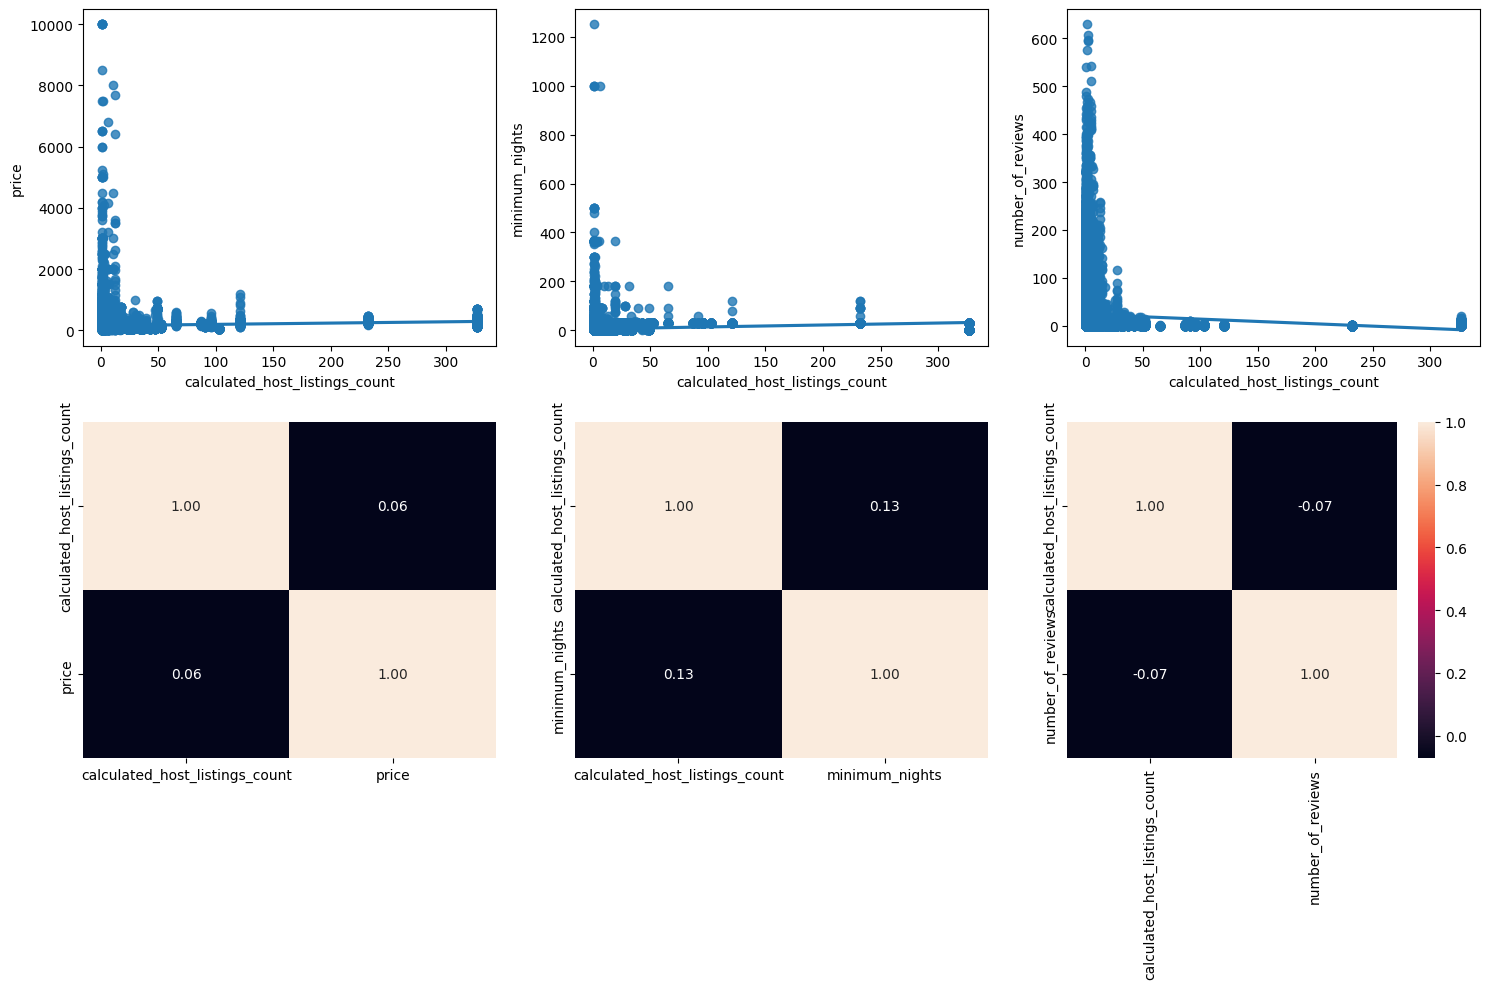

In [70]:
NumericalNumericalGraf(data, "calculated_host_listings_count", ["price", "minimum_nights", "number_of_reviews"])

In [ ]:
#Analisis categorico/categorico

def CategoricalCategoricalGraf(data):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(10,7))

    